# Sơ lược về bộ dữ liệu

## Thu thập dữ liệu

Dữ liệu được lấy top 100 kênh youtube theo `SB Rank` của từng quốc gia từ web **socialblade** bằng `beautifulsoup` và `selenium`.

## Câu chuyện, ngữ cảnh nào khiến cho nhóm sinh viên thực hiện việc tìm kiếm dữ liệu?

Nguyên nhân lựa chọn là do bộ dữ liệu có nhiều thông tin thú vị để khai thác và đáp ứng được những yêu cầu thầy đề ra.

## Dữ liệu của nhóm là đề tài gì và lấy từ nguồn nào?

Bộ dữ liệu có chủ đề về các kênh youtube trên thế giới.

Nguồn: [socialblade](https://socialblade.com/youtube/)

# Khám phá dữ liệu

## Khai báo các thư viện cần thiết

In [1]:
import pandas as pd
import numpy as np
from dateutil.parser import parse
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('../datasets/data.csv')
data.drop_duplicates(subset = ['channel_id'], inplace = True)
data.head(5)

,channel_id,channel_name,uploads,subscribers,video_views,country,channel_type,user_created,total_grade,social_blade_rank,subscriber_rank,video_views_rank,country_rank,channel_type_rank,subscribers_last_30_days,video_views_last_30_days,estimated_monthly_earnings,estimated_yearly_earnings,estimated_monthly_earnings_min,estimated_monthly_earnings_max,estimated_yearly_earnings_min,estimated_yearly_earnings_max,country_name
0,UCjfTi2zL7K6aX7_0EMIBukw,Televizioni Koha Tetovë,28878.0,101000.0,132074533.0,MK,Entertainment,"Feb 9th, 2013",B,235323.0,2312.0,96777.0,38.0,1914.0,1800.0,1221000.0,$305 - $4.9K,$3.7K - $58.6K,305.0,4900.0,3700.0,58600.0,Macedonia
1,UCFXJEYupgsUNDLLW338ctew,Out,675.0,60400.0,29418107.0,MK,People,"Dec 27th, 2020",B,443470.0,2818.0,356875.0,62.0,2082.0,1300.0,291130.0,$73 - $1.2K,$873 - $14K,73.0,1200.0,873.0,14000.0,Macedonia
2,UCOrLhuw4w09n_Uz_RKBwdUA,Diy Things,138.0,15500.0,8881452.0,US,NaN,"Oct 24th, 2011",B,184685.0,6052.0,911100.0,209.0,NaN,2300.0,1995000.0,$499 - $8K,$6K - $95.8K,499.0,8000.0,6000.0,95800.0,United States of America
3,UCLadFapyecCYAeuTqc12avA,Prof. Sam Vaknin,1186.0,276000.0,56546838.0,MK,People,"Feb 11th, 2009",B,234604.0,2014.0,207302.0,12.0,1469.0,7000.0,1342000.0,$335 - $5.4K,$4K - $64.4K,335.0,5400.0,4000.0,64400.0,Macedonia
4,UC2vecTBpi6mjJeHCdcax_0g,Grupa Maestro,112.0,36400.0,23938907.0,MK,Music,"Nov 24th, 2012",B,251756.0,3436.0,422357.0,106.0,2455.0,2300.0,1100000.0,$275 - $4.4K,$3.3K - $52.8K,275.0,4400.0,3300.0,52800.0,Macedonia


## Dữ liệu gồm bao nhiêu cột? Bao nhiêu dòng?

In [3]:
print('Dữ liệu có', data.shape[0], 'dòng và', data.shape[1], 'cột')

Dữ liệu có 20734 dòng và 23 cột


## Dữ liệu nào bị thiếu không?

In [4]:
data.isna().sum()

channel_id                           0
channel_name                       386
uploads                            386
subscribers                        386
video_views                        386
country                            485
channel_type                      4712
user_created                       386
total_grade                        386
social_blade_rank                  386
subscriber_rank                    386
video_views_rank                   386
country_rank                       387
channel_type_rank                 4718
subscribers_last_30_days          3447
video_views_last_30_days           540
estimated_monthly_earnings         386
estimated_yearly_earnings          386
estimated_monthly_earnings_min     386
estimated_monthly_earnings_max     386
estimated_yearly_earnings_min      386
estimated_yearly_earnings_max      386
country_name                       485
dtype: int64

Ở đây ta có thể thấy cột `channel_type_rank` và `subscribers_last_30_days` có số lượng missing khá cao tuy nhiên những cột này không liên quan nhiều đến việc phân tích nên ta có thể để nguyên như vậy để làm tiếp.

Tuy nhiên, ở đây ta có thể thấy số lượng missing `386` xuất hiện ở hầu hết các cột, như vậy có thể là đang có 386 dòng bị miss dữ liệu. Ta sẽ xuất ra thử những dòng có `channel_name` là `nan` để xem thử kết quả.

In [5]:
data[data['channel_name'].isna()].head(5)

,channel_id,channel_name,uploads,subscribers,video_views,country,channel_type,user_created,total_grade,social_blade_rank,subscriber_rank,video_views_rank,country_rank,channel_type_rank,subscribers_last_30_days,video_views_last_30_days,estimated_monthly_earnings,estimated_yearly_earnings,estimated_monthly_earnings_min,estimated_monthly_earnings_max,estimated_yearly_earnings_min,estimated_yearly_earnings_max,country_name
36,UC0XGaH24t8jk-DgE8SDQpkQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39,UCivG45hjolbtn7LPlgUbvOQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40,UCACPdTfO4f2MTQyeMQGzMIw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44,UCvompx5cckmEscal4R-Hbxw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
373,ZZamjayes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Thật vây, những `386` dòng này trừ cột `channel_id` ra thì toàn `NaN`. Vậy, ta sẽ thực hiện drop những dòng trên.

In [6]:
data = data.dropna(subset=['channel_name'])
data = data.dropna(subset=['country_rank'])

Sau khi thực hiện drop những dòng nói trên, việc missing đã được giảm đáng kể.

Đối với 2 cột `channel_type` dạng `categorical` thực hiện điền vào `Unknown`. Cột `country` là mã của quốc gia được hiển thị cụ thể ở cột `country_name` nên ta sẽ thực hiện drop cột này.

In [7]:
data['channel_type'] = data['channel_type'].fillna('Unknown')
data.drop('country', axis=1, inplace=True)

Sau quá trình khám phá dữ liệu missing của cột `country_name` thì nhóm nhận thấy 98 dòng missing nằm liên tiếp nhau từ `2189` đến `2288`, với dữ liệu dòng `2188` là `Myanmar`, `2289` là `Nauru`. Dữ liệu được xếp theo thứ tự quốc gia như trong file `country_list.json` và giữa 2 quốc gia này là `Nambia` - không có trong dữ liệu sau khi cào. 

Như vậy ta suy ra `98` dòng bị thiếu này là `Nambia`.

Các dữ liệu bị thiếu riêng lẻ khác sẽ được điền là quốc gia của dòng liền trên.

In [8]:
data.loc[data.index < 3000, 'country_name'] = data.loc[data.index < 3000, 'country_name'].fillna('Nambia')
data['country_name'] = data['country_name'].fillna(data['country_name'].shift())

In [9]:
data.isna().sum()

channel_id                           0
channel_name                         0
uploads                              0
subscribers                          0
video_views                          0
channel_type                         0
user_created                         0
total_grade                          0
social_blade_rank                    0
subscriber_rank                      0
video_views_rank                     0
country_rank                         0
channel_type_rank                 4332
subscribers_last_30_days          3061
video_views_last_30_days           154
estimated_monthly_earnings           0
estimated_yearly_earnings            0
estimated_monthly_earnings_min       0
estimated_monthly_earnings_max       0
estimated_yearly_earnings_min        0
estimated_yearly_earnings_max        0
country_name                         0
dtype: int64

## Từng cột có kiểu dữ liệu là gì? Có phù hợp hay chưa?

In [10]:
data.dtypes

channel_id                         object
channel_name                       object
uploads                           float64
subscribers                       float64
video_views                       float64
channel_type                       object
user_created                       object
total_grade                        object
social_blade_rank                 float64
subscriber_rank                   float64
video_views_rank                  float64
country_rank                      float64
channel_type_rank                 float64
subscribers_last_30_days          float64
video_views_last_30_days          float64
estimated_monthly_earnings         object
estimated_yearly_earnings          object
estimated_monthly_earnings_min    float64
estimated_monthly_earnings_max    float64
estimated_yearly_earnings_min     float64
estimated_yearly_earnings_max     float64
country_name                       object
dtype: object

Cột `user_create` có kiểu dữ liệu không phù hợp, ta sẽ chuyển thành dạng datetime

In [11]:
data['user_created'] = data['user_created'].apply(lambda x: parse(x) if x != '--' else None)

In [12]:
data.dtypes

channel_id                                object
channel_name                              object
uploads                                  float64
subscribers                              float64
video_views                              float64
channel_type                              object
user_created                      datetime64[ns]
total_grade                               object
social_blade_rank                        float64
subscriber_rank                          float64
video_views_rank                         float64
country_rank                             float64
channel_type_rank                        float64
subscribers_last_30_days                 float64
video_views_last_30_days                 float64
estimated_monthly_earnings                object
estimated_yearly_earnings                 object
estimated_monthly_earnings_min           float64
estimated_monthly_earnings_max           float64
estimated_yearly_earnings_min            float64
estimated_yearly_ear

In [13]:
data = data.dropna(subset=['user_created'])
data.reset_index(drop = True, inplace = True)
data.to_csv('../datasets/data_train_test.csv',index = False)

## Mỗi cột có ý nghĩa gì?

In [14]:
pd.read_csv('../datasets/columns_meaning.csv', index_col = 0)

,Tên cột,Ý nghĩa,Kiểu dữ liệu
0,channel_id,Id kênh,object
1,channel_name,Tên kênh,object
2,uploads,Số lượng video,float64
3,subscribers,Số subcribers,float64
4,video_views,Tổng số lượt xem,float64
5,channel_type,Thể loại,object
6,user_created,Thời gian người dùng tham gia youtube,datetime64[ns]
7,total_grade,Xếp loại,object
8,social_blade_rank,Xếp hạng theo social blade,float64
9,subscriber_rank,Xếp hạng theo số lượng người theo dõi,float64


## Dữ liệu có trùng lặp không?

In [15]:
data.duplicated().any()

False

Dữ liệu không có dòng nào bị trùng lặp

## Với mỗi cột dữ liệu được phân bố như thế nào?

### Với dữ liệu dạng số

In [16]:
data.select_dtypes(include=['number']).describe().round(1)


,uploads,subscribers,video_views,social_blade_rank,subscriber_rank,video_views_rank,country_rank,channel_type_rank,subscribers_last_30_days,video_views_last_30_days,estimated_monthly_earnings_min,estimated_monthly_earnings_max,estimated_yearly_earnings_min,estimated_yearly_earnings_max
count,20345.0,20345.0,2.034500e+04,20345.0,20345.0,20345.0,20345.0,16014.0,17286.0,2.019300e+04,20345.0,20345.0,20345.0,20345.0
mean,1962.7,930808.0,5.534383e+08,435419.0,6396.7,1560963.3,197.7,2878.0,48739.8,2.671933e+07,6545.3,104735.6,78538.0,1256604.6
std,13407.9,4550950.5,3.426158e+09,353264.3,5145.9,1597622.5,294.5,2083.4,201972.1,1.020655e+08,25310.8,405088.6,303590.7,4859510.3
min,0.0,0.0,0.000000e+00,1.0,1.0,1.0,1.0,1.0,1.0,1.000000e+00,0.0,0.0,0.0,0.0
25%,44.0,1980.0,5.908540e+05,48425.0,1920.0,81950.0,37.0,1231.0,60.0,6.550000e+03,3.0,22.0,17.0,268.0
50%,164.0,30300.0,1.104059e+07,472502.0,3837.0,766751.0,92.0,2387.0,1800.0,3.905400e+05,80.0,1300.0,964.0,15400.0
75%,555.0,367000.0,1.600024e+08,808677.0,12325.0,3435845.0,221.0,4251.0,20000.0,9.909000e+06,2300.0,37500.0,28100.0,449900.0
max,686930.0,245000000.0,2.272135e+11,1001570.0,54940.0,4028628.0,7276.0,22411.0,8000000.0,2.916000e+09,729100.0,11700000.0,8700000.0,140000000.0


**Nhận xét:**
- Các cột thể hiện số lượng như số lượt xem, số lượt đăng ký và thu nhập có độ lệch rất lớn, một nhóm số  rất ít đạt giá trị rất cao so với phần còn lại.
- Các cột thể hiện xếp hạng có độ lệch ít hơn, nhưng vẫn rất lớn. Đa số đều có xếp hạng cao (giá trị xếp hạng nhỏ) bởi vì dữ liệu của chúng ta là lấy top 100 kênh YouTube nổi bật của mỗi quốc gia.
- Giá trị max của các cột số lượng lớn hơn hẳn so với phần còn lại (gấp hơn 200 lần so với giá trị trung bình)

Ta vẽ biểu đồ Boxplot và Violinplot để thể hiện sự phân bố dữ liệu với các cột dạng số.

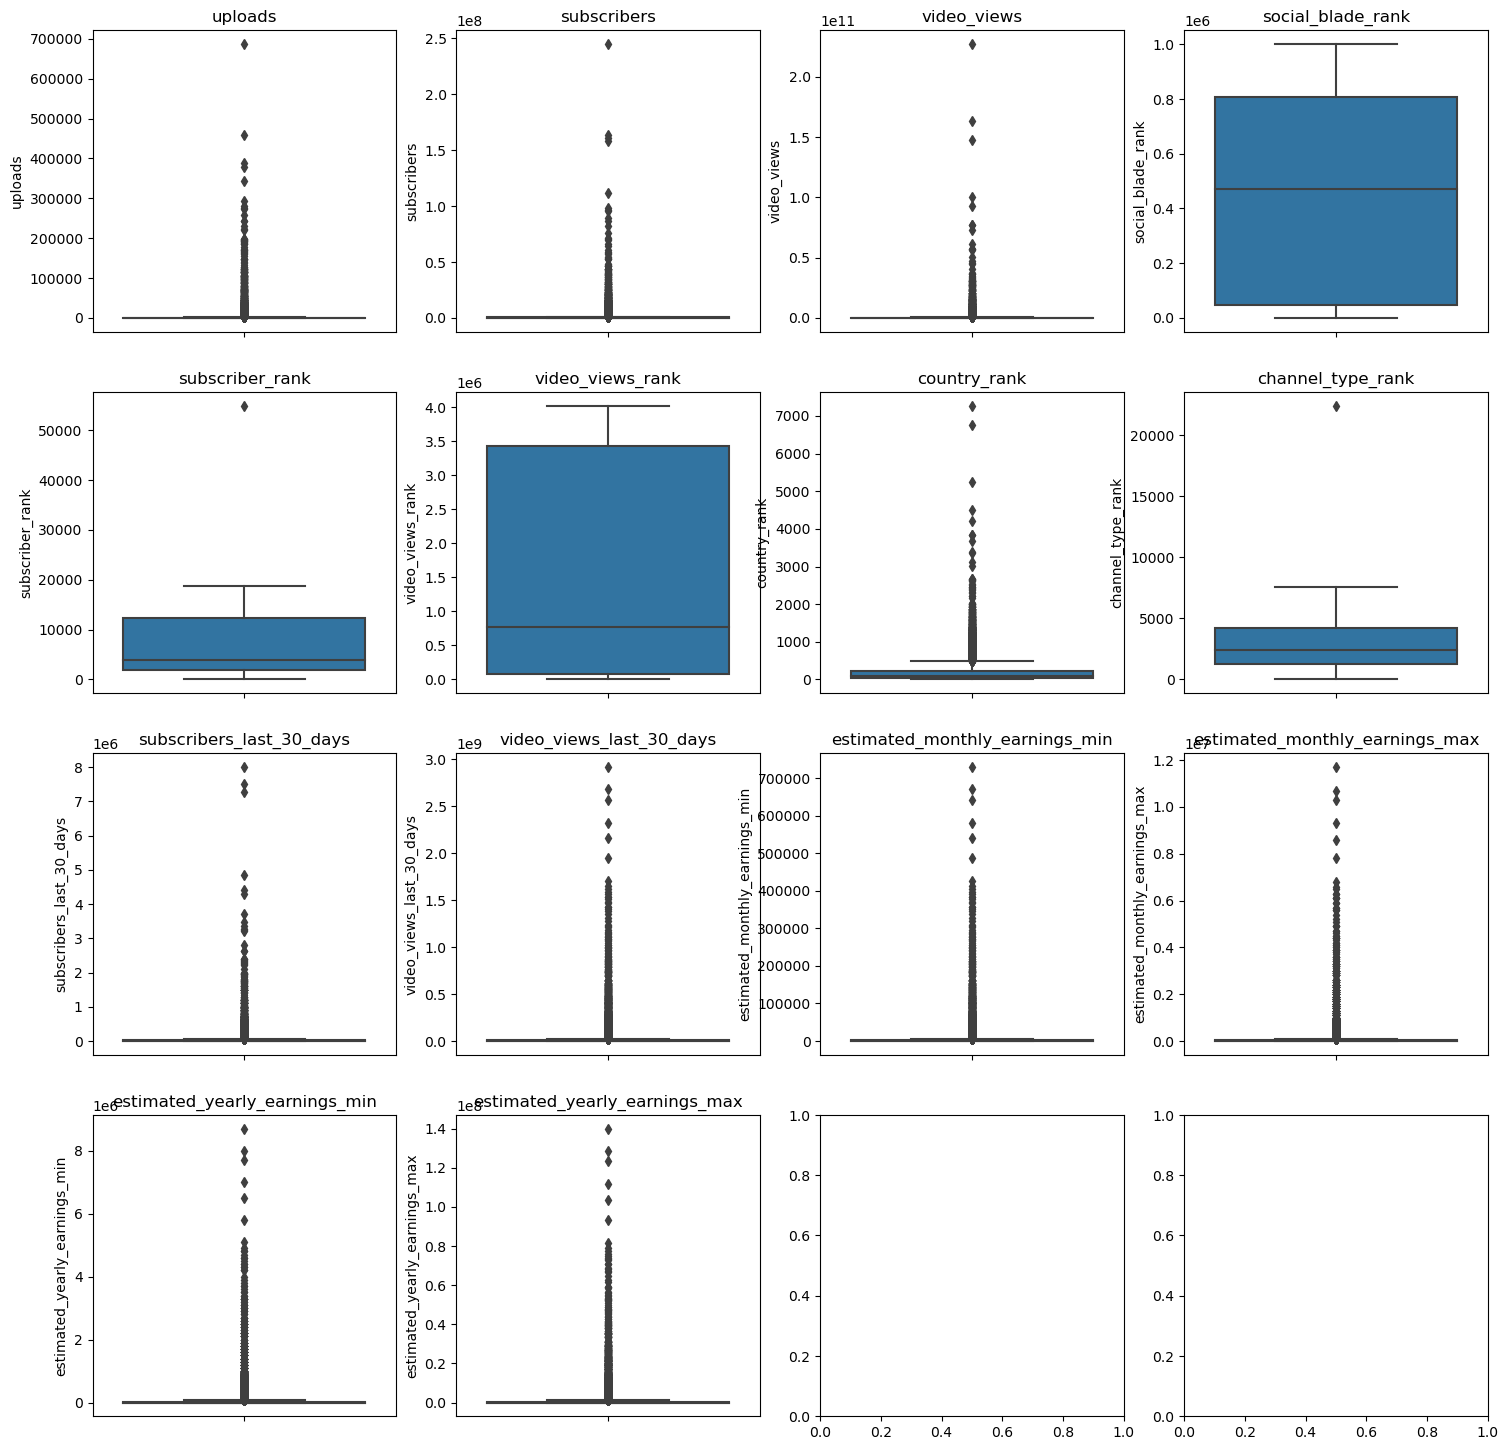

In [17]:
fig, axs = plt.subplots(4, 4, figsize=(18, 18))
axs = axs.flatten()
for i, col in enumerate(data._get_numeric_data().columns):
    sns.boxplot(data = data, y = data[col], ax = axs[i])
    axs[i].set_title(col)
plt.show()

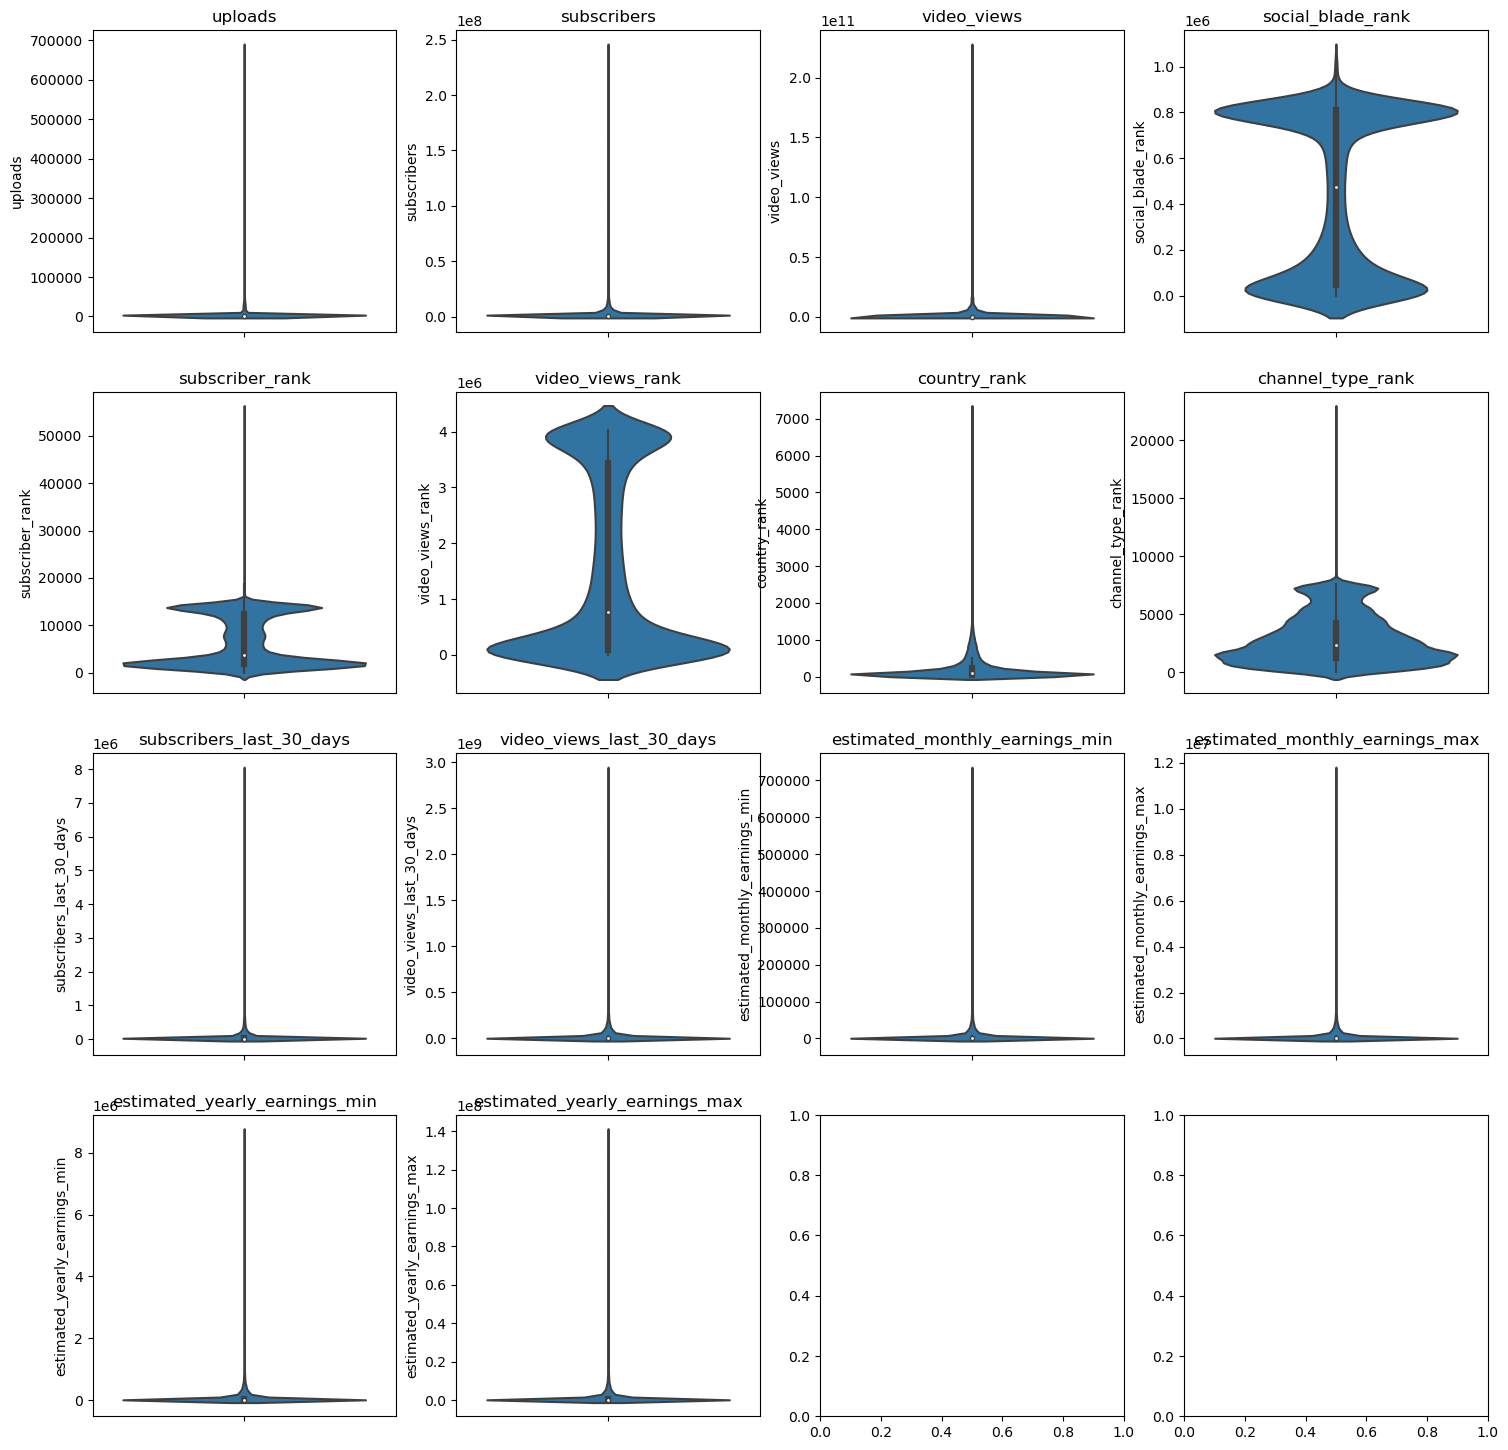

In [18]:
fig, axs = plt.subplots(4, 4, figsize=(18, 18))
axs = axs.flatten()
for i, col in enumerate(data._get_numeric_data().columns):
    sns.violinplot(data = data, y = data[col], ax = axs[i], orient='h')
    axs[i].set_title(col)
plt.show()

**Nhận xét**
- Ở boxplot, ta thấy được các cột thể hiện số lượng có rất nhiều outliers, các outliers này có giá trị rất lớn so với phần còn lại. 
- Ở violinplot các cột thể hiện số lượng còn phân bố dày ở phần đáy, mỏng ở phần đỉnh. Dữ liệu đa số phân bố ở mức thấp, mức cao rất ít.
- Ở violinplot các cột thể hiện xếp hạng dày ở 2 đầu, lép ở giữa. Đa số ở đáy dày hơn, trừ `social blade rank`. Dữ liệu phân bố chủ yếu ở mức rank cao (giá trị thấp). Cũng có rất nhiều phân bố ở mức rank thấp (giá trị cao). Còn ở mức trung bình thường chiếm số ít. Riêng `country rank` thì mỗi quốc gia đều lấy top 100 theo social blade nên dữ liệu cũng tập trung chủ yếu ở mức giá trị thấp.

### Đối với các cột kiểu categorical

In [19]:
data[['channel_type', 'total_grade', 'country_name']].describe()

,channel_type,total_grade,country_name
count,20345,20345,20345
unique,16,11,212
top,Unknown,C+,Vietnam
freq,4326,5210,212


Ta vẽ biểu đồ cột để trực quan sự phân bố các giá trị categorical

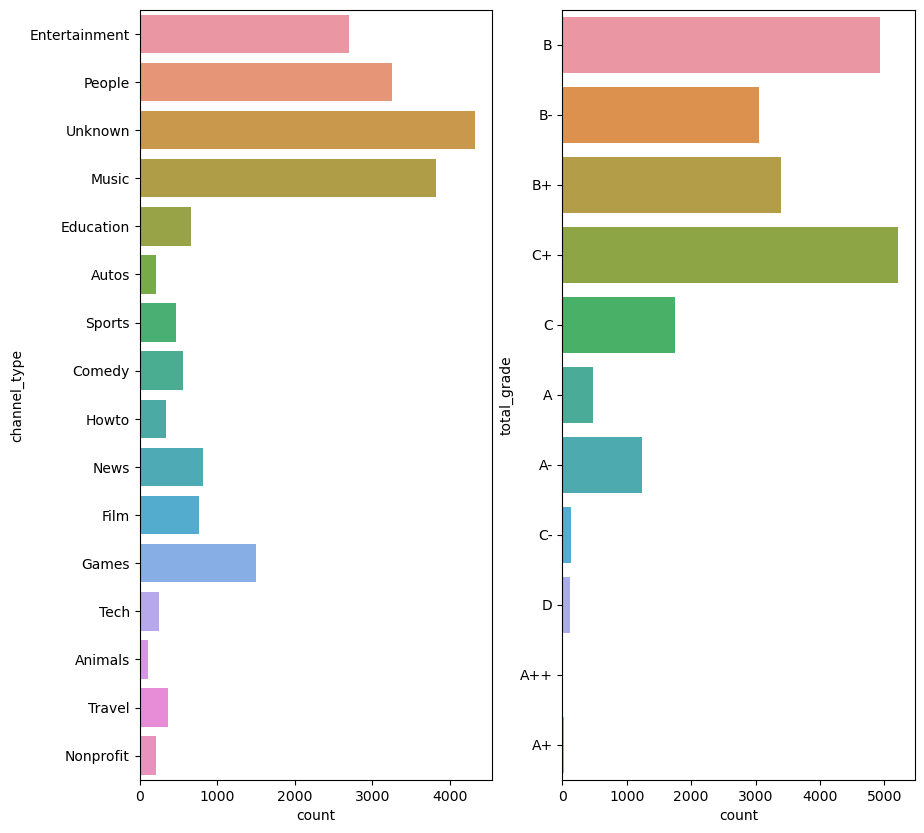

In [20]:
fig, axs = plt.subplots(1, 2, figsize=(10, 10))

axs = axs.flatten()
for i, col in enumerate(['channel_type', 'total_grade']):
    chart = sns.countplot(data = data, y = col, ax = axs[i])
plt.show()

**Nhận xét:**
- Số lượng các kênh không xác định chủ đề rõ ràng chiếm số lượng nhiều nhất
- Ngoại trừ các kênh không xác định chủ đề ra thì mặc dù có đến 15 chủ đề khác nhau, nhưng các kênh đa số đều chủ yếu về các chủ đề  chính là `Entertainment`, `People`, `Music`,`Games`. 
- Với bộ dữ liệu chúng ta thu thập, đa số các kênh được xếp loại từ mức C+ đến B. Mức A- cũng có số lượng tương đối, còn mức xếp loại từ A trở lên và từ C- trở xuống rất ít.

## Phân tích độ tương quan giữa các biến

<AxesSubplot:>

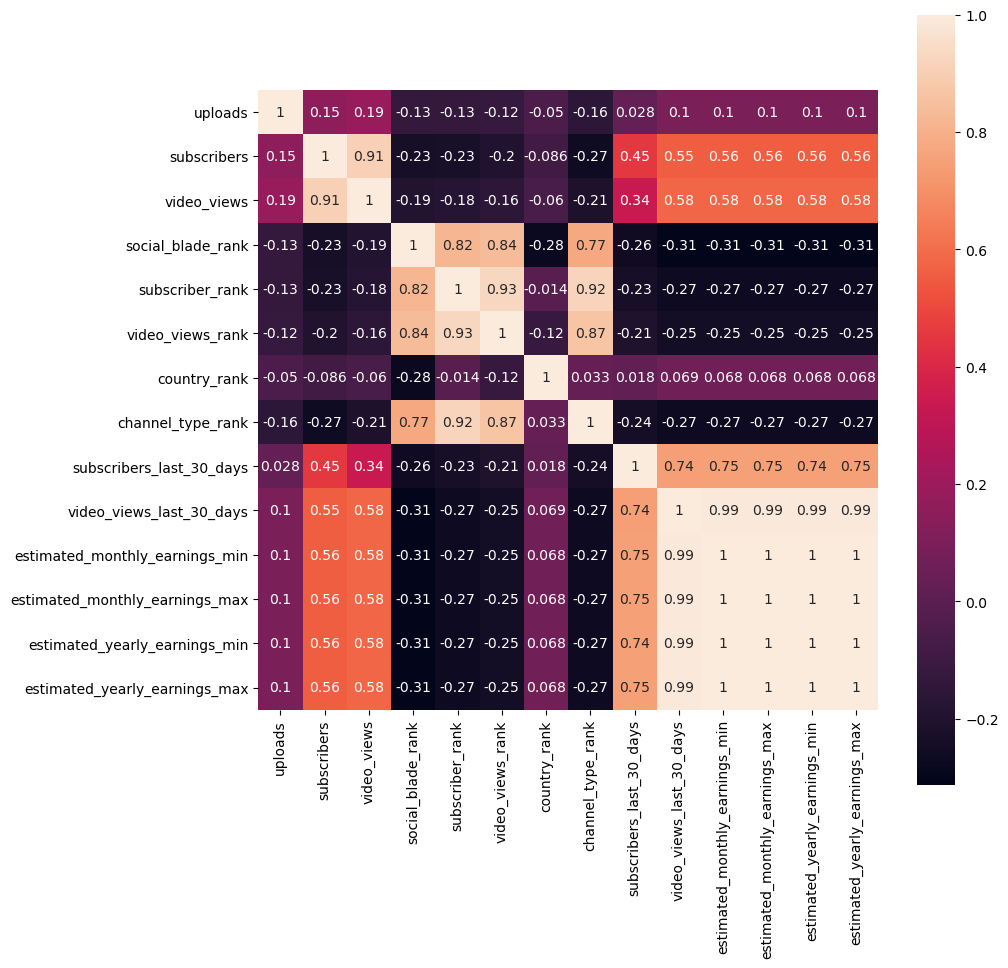

In [21]:
corrmat = data.corr()
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corrmat, annot=True,square=True)

**Nhận xét**
- Độ tương quan giữa số lượt xem và số lượt đăng ký kênh là rất lớn. 
- Thu nhập kiếm được không tương quan quá mạnh với số lượng xem và lượt đăng ký của kênh, thay vào đó 2 feature này tương quan mạnh với số lượng đăng ký kênh trong 30 ngày gần đây và lượt xem trong 30 ngày gần đây.
- Ngoại trừ `country_rank`, các thông tin về xếp hạng còn lại đều có độ tương quan với nhau rất mạnh

# Phân tích dữ liệu đơn giản

Sau khi thực hiện xong phần thống kê mô tả về dữ liệu, ta thực hiện một vài phân tích đơn giản về dữ liệu để khám phá thêm các mối quan hệ trong dữ liệu

## Thể loại nào được quan tâm nhất từ YouTube

Để biết thể loại nào được quan tâm nhất từ YouTube, ta đánh giá theo 2 tiêu chí mà bộ dữ liệu đã cung cấp: Lượt xem và số lượng uploads.

Nhóm cũng thực hiện so sánh giữa Việt Nam và thế giới

In [22]:
vietnam = data[data['country_name']=='Vietnam']

### Theo lượt xem

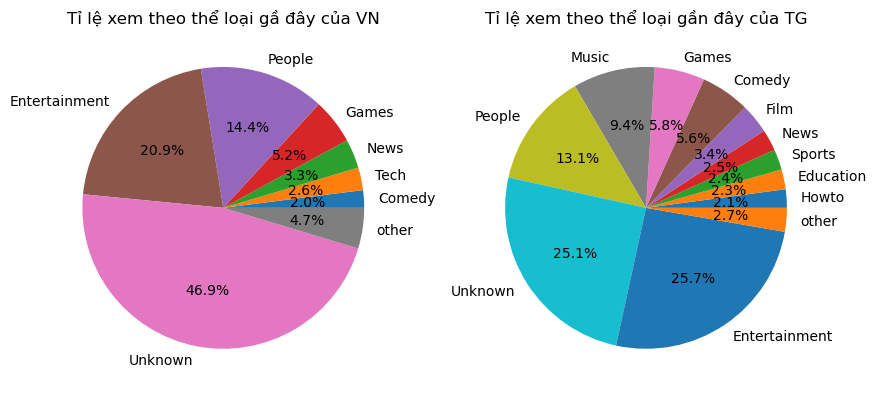

In [23]:
df1 = vietnam.groupby('channel_type')['video_views_last_30_days'].sum().sort_values()
df1['other']= df1[:5].sum()

df2 = data.groupby('channel_type')['video_views_last_30_days'].sum().sort_values()
df2['other']= df2[:5].sum()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
axes[0].pie(df1.values[5:], labels=df1.index[5:], autopct='%1.1f%%')
axes[0].set_title('Tỉ lệ xem theo thể loại gầ đây của VN')

axes[1].pie(df2.values[5:], labels=df2.index[5:], autopct='%1.1f%%')
axes[1].set_title('Tỉ lệ xem theo thể loại gần đây của TG')

plt.show()

### Theo số video upload

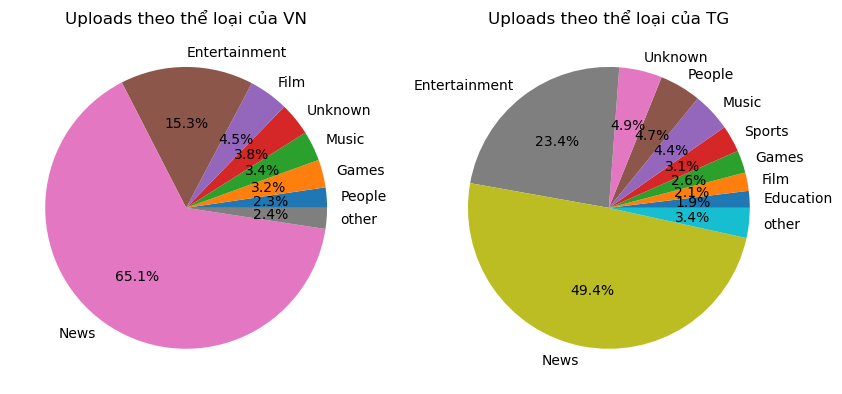

In [25]:
df1 = vietnam.groupby('channel_type')['uploads'].sum().sort_values()
df1['other']= df1[:5].sum()

df2 = data.groupby('channel_type')['uploads'].sum().sort_values()
df2['other']= df2[:7].sum()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
axes[0].pie(df1.values[5:], labels=df1.index[5:], autopct='%1.1f%%')
axes[0].set_title('Uploads theo thể loại của VN')

axes[1].pie(df2.values[7:], labels=df2.index[7:], autopct='%1.1f%%')
axes[1].set_title('Uploads theo thể loại của TG')

plt.show()

**Nhận xét:**
- Xét về số lượt xem, 3 thể loại là `Unknown`, `Entertainment`, và `People` là 3 thể loại được xem nhiều nhất tại Việt Nam và cả trên thế giới. Tuy nhiên đối với Việt Nam, người dùng xem những chủ đề, thể loại không xác định nhiều hơn. Và có vẻ như người Việt Nam không quá thích nghe nhạc trên YouTube, bởi vì tỉ lệ sử dụng YouTube để nghe nhạc trên thế giới cũng chiếm tỉ lệ không nhỏ.
- Xét theo lượng video được tải lên YouTube, các video  về tin tức lại đứng số 1, và áp đảo so với phần còn lại. Chứng tỏ thể loại video về tin tức cũng là một thể loại quan trọng. Nhưng vì tin tức thì rất nhiều, luôn luôn cập nhật liên tục, và không phải ai cũng quan tâm đến tất cả loại tin tức, họ chỉ xem cái mà họ quan tâm nên mặc dù được tải lên nhiều nhưng lượt xem về thể loại này cũng không lớn.

## Phân tích theo quốc gia

### Xếp theo số lượt xem

Do có đến hơn 200 quốc gia, nên chúng ta chỉ hiển thị top 20 quốc gia có số lượt xem nhiều nhất. Hơn nữa, chỉ với top 20 quốc gia thì đã chiếm gần 70% tổng số lượt xem YouTube trên thế giới

In [27]:
views_by_country = data.groupby('country_name')['video_views'].sum()
total_views = data['video_views'].sum()
(views_by_country /total_views).sort_values()[-20:].sum()*100

68.60599433078862

In [28]:
top20 = views_by_country.sort_values()[-20:]
top20_last_30_days = data.groupby('country_name')['video_views_last_30_days'].sum().sort_values()[-20:]

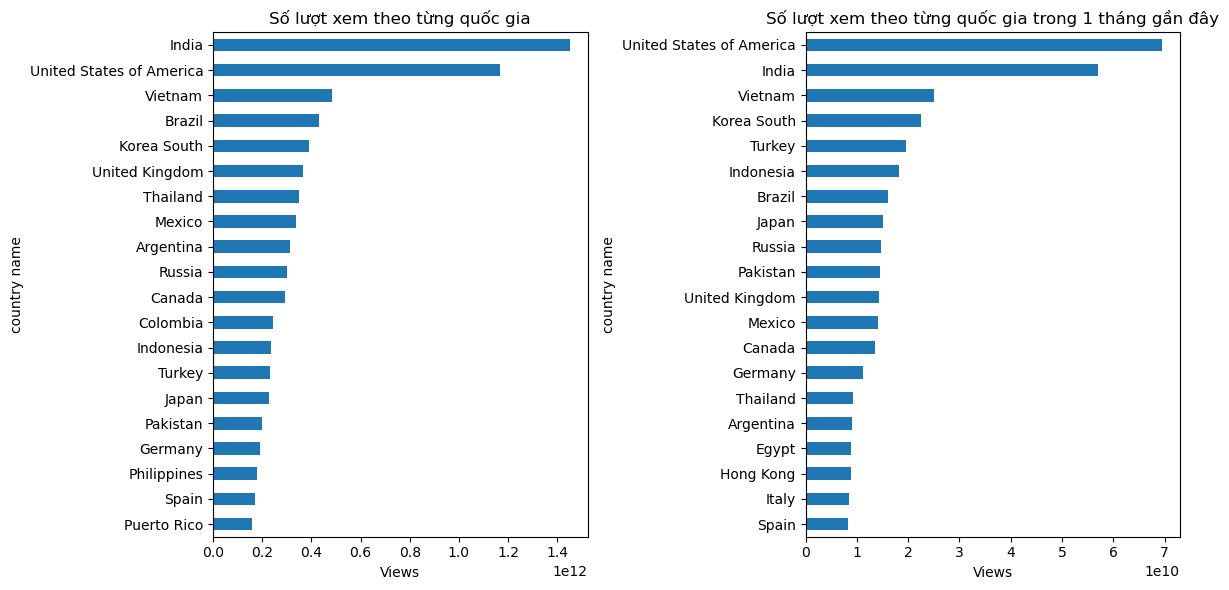

In [29]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

top20.plot(x='country_name', y='Value', kind='barh', ax= axes[0])
axes[0].set_xlabel('Views')
axes[0].set_ylabel('country name')
axes[0].set_title('Số lượt xem theo từng quốc gia')

top20_last_30_days.plot(x='country_name', y='Value', kind='barh',ax = axes[1])
axes[1].set_xlabel('Views')
axes[1].set_ylabel('country name')
axes[1].set_title('Số lượt xem theo từng quốc gia trong 1 tháng gần đây')

plt.tight_layout()
plt.show()

**Nhận xét:**
- Ấn Độ và Mỹ xem YouTube nhiều nhất trên thế giới và nhiều hơn hẳn phần còn lại. Cũng đúng bởi vì đây là 2 quốc gia lớn, dấn số rất đông. 
- Việt Nam của chúng ta cũng xem không ít trên YouTube, đứng thứ 3 trên toàn thời gian. 
- So với trên toàn thời gian thì trong thời gian gần đây, có rất quốc gia mới thuộc vào top lượt xem, đều là các quốc gia đông dân. Có lẽ là do các nước này tiếp cận YouTube sau nên so trên toàn thời gian chưa bằng các quốc gia khác cũng có thể là do có chủ đề nào hot ở các quốc gia này.



### Xếp theo số lượng đăng ký 

In [30]:
top20 = data.groupby('country_name')['subscribers'].sum().sort_values()[-20:]
top20_last_30_days = data.groupby('country_name')['subscribers_last_30_days'].sum().sort_values()[-20:]

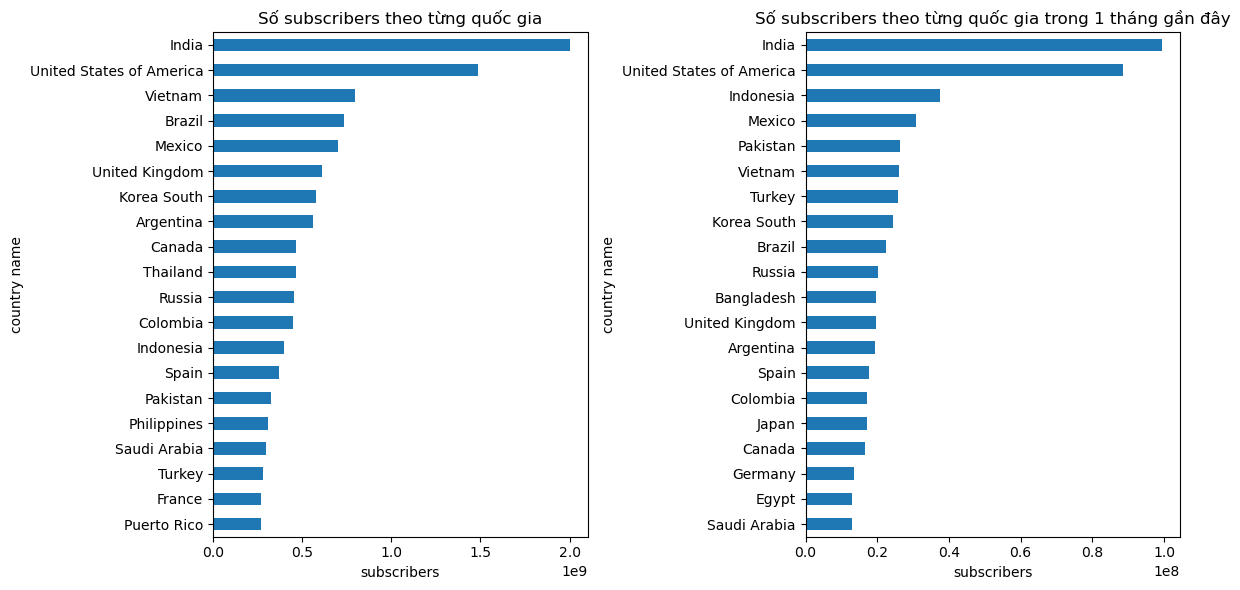

In [31]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

top20.plot(x='country_name', y='Value', kind='barh', ax= axes[0])
axes[0].set_xlabel('subscribers')
axes[0].set_ylabel('country name')
axes[0].set_title('Số subscribers theo từng quốc gia')

top20_last_30_days.plot(x='country_name', y='Value', kind='barh',ax = axes[1])
axes[1].set_xlabel('subscribers')
axes[1].set_ylabel('country name')
axes[1].set_title('Số subscribers theo từng quốc gia trong 1 tháng gần đây')

plt.tight_layout()
plt.show()

**Nhận xét:**
- Biểu đồ số lượt đăng ký có hình dáng rất giống so với biểu đồ của lượt xem đã trình bày trước đó. Có lẽ là vì đây là 2 thuộc tính có mối quan hệ chặt chẽ với nhau

### Xếp theo thu nhập kiếm được từ YouTube

In [32]:
top20 = data.groupby('country_name')['estimated_yearly_earnings_max'].sum().sort_values()[-20:]
top20_monthly = data.groupby('country_name')['estimated_monthly_earnings_max'].sum().sort_values()[-20:]

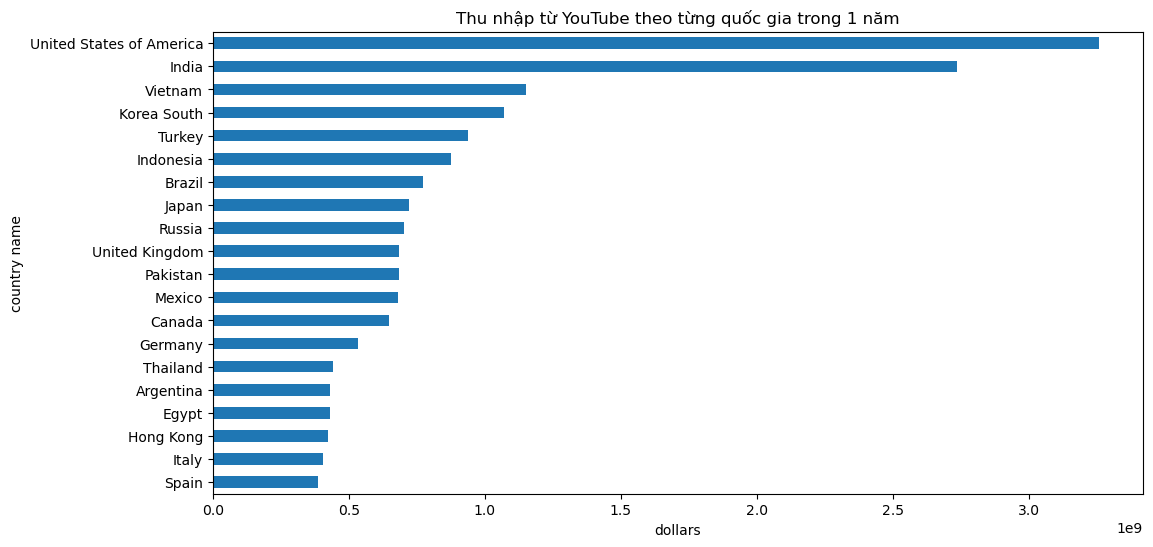

In [33]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))

top20.plot(x='country_name', y='Value', kind='barh')
plt.xlabel('dollars')
plt.ylabel('country name')
plt.title('Thu nhập từ YouTube theo từng quốc gia trong 1 năm')
plt.show()

**Nhận xét:**
- Phần lớn các nước có nhiều lượt xem trên YouTube thì sẽ kiếm được thu nhập lớn trên YouTube. Tuy nhiên vẫn có một chút khác biệt.
- Ấn Độ và Mỹ vẫn là 2 quốc gia đứng top đầu và chênh lệch lớn so với phần còn lại
- Mặc dù Ấn Độ có nhiều lượt xem hơn Mỹ  nhưng Mỹ vẫn là quốc gia kiếm được nhiều tiền nhất từ YouTube.
- Đa số các quốc gia kiếm được nhiều tiền từ YouTube đều là các nước châu Á. Cũng có vài nước thuộc châu Mỹ và châu Âu nhưng không bằng.
- Việt Nam rất ưa thích kiếm tiền từ YouTube khi thuộc top khá cao trong các quốc gia kiếm được nhiều tiền từ YouTube

## Tương quan giữa số người đăng ký và số lượt xem

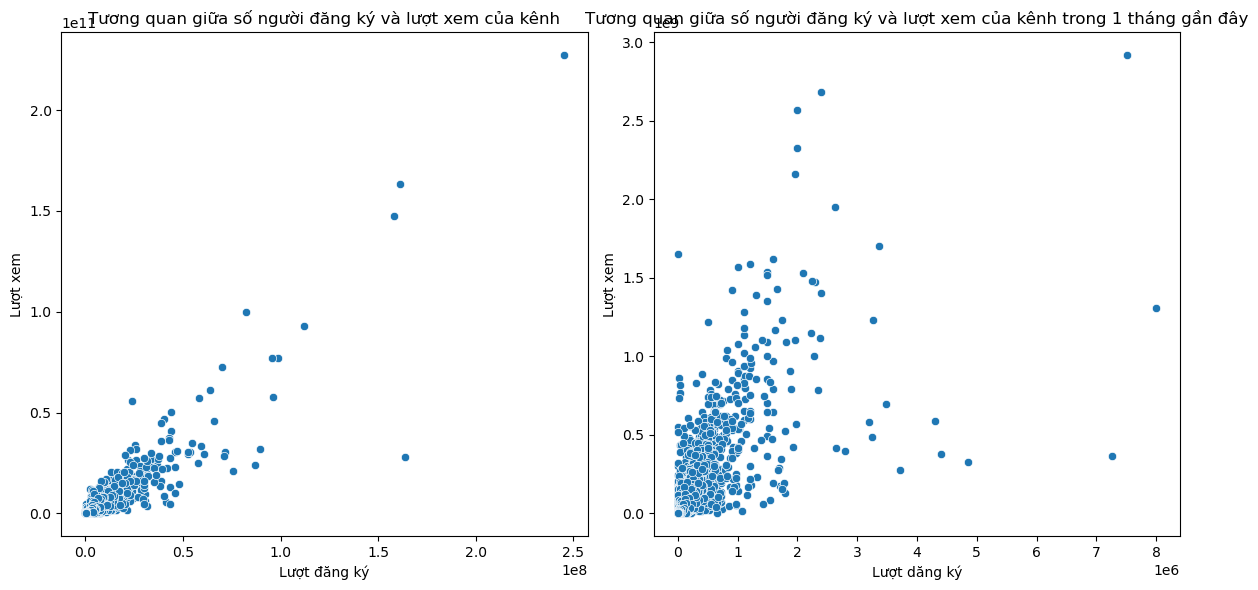

In [34]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

sns.scatterplot(data=data, x='subscribers', y='video_views', ax=axes[0])
axes[0].set_xlabel('Lượt đăng ký')
axes[0].set_ylabel('Lượt xem')
axes[0].set_title('Tương quan giữa số người đăng ký và lượt xem của kênh')

sns.scatterplot(data=data, x='subscribers_last_30_days', y='video_views_last_30_days', ax=axes[1])
axes[1].set_xlabel('Lượt dăng ký')
axes[1].set_ylabel('Lượt xem')
axes[1].set_title('Tương quan giữa số người đăng ký và lượt xem của kênh trong 1 tháng gần đây')

plt.tight_layout()
plt.show()

**Nhận xét**
- Tổng số người đăng ký kênh tuyến tính với tổng số lượt xem. Độ tương quan giữa 2 thuộc tính này rất mạnh
- Tuy không bằng nhưng độ tương quan giữa lượt đăng ký kênh trong 30 ngày và số lượt xem trong 30 ngày cũng khá cao. 
- Nhìn qua thì hình bên phải (dữ liệu trong 30 ngày gần đây) phân bố dốc hơn, có lẻ bởi lượt đăng ký kênh thì chỉ có từ người dùng chưa đăng ký kênh, trong khi lượt xem thì khác, ai cũng có thể xem. Nhưng nhìn chung, khi số lượt đăng ký tăng, thì số lượt xem cũng tăng.

## Số lượng kênh được tạo theo thời gian

In [35]:
count_channel = data.groupby('user_created').count()['channel_id'].resample('M').sum()

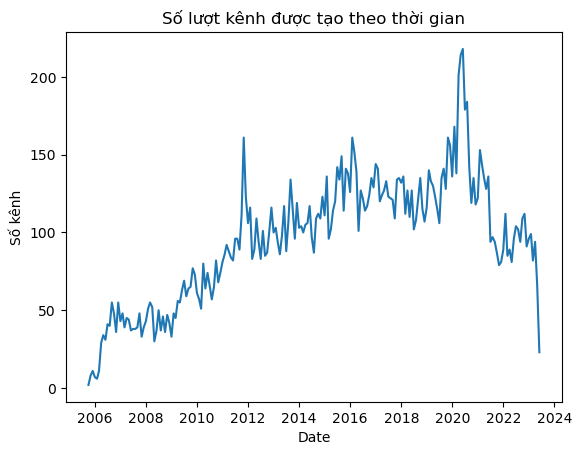

In [37]:
sns.lineplot(data=count_channel)
plt.title('Số lượt kênh được tạo theo thời gian')
plt.xlabel('Date')
plt.ylabel('Số kênh')
plt.show()

**Nhận xét**
- Càng về sau thì số kênh YouTube được tạo thêm trong 1 khoảng thời gian càng ngày càng tăng.
- Đỉnh điểm là vào giai đoan 2020-2021, có lẽ giai đoạn này là thời gian dịch bệnh, ở nhà nhiều, nhiều người hoạt động trên mạng.
- Dữ liêu từ khoảng sau 2021 thấp, là bởi vì dữ liệu của chúng ta lấy theo top 100 của mỗi nước, thời gian quá gần mốc thời gian hiện tại có thể kênh chưa kịp phát triển để vào dữ liệu của chúng ta.

## Xuất file tiền xử lý cho các bước trực quan và so sánh

In [39]:
vietnam = vietnam.sort_values('social_blade_rank').head(100)
data = pd.concat([data[data.country_name !='Vietnam'],vietnam])
data.to_csv('../datasets/data_preprocess.csv',index = False)